## Requests : super simple requests
Warning: Recreational use of other HTTP libraries may result in dangerous side-effects, including: security vulnerabilities, verbose code, reinventing the wheel, constantly reading documentation, depression, headaches, or even death.

In [10]:
import requests
r = requests.get('https://api.github.com/users/LucasBerbesson/repos')
data = r.json()

for element in data:
    print(element['language'],":", element['clone_url'])

HTML : https://github.com/LucasBerbesson/apifier.git
Arduino : https://github.com/LucasBerbesson/Bricolage-numerique.git
Arduino : https://github.com/LucasBerbesson/Laser-cat.git
Jupyter Notebook : https://github.com/LucasBerbesson/mightypython.git
Python : https://github.com/LucasBerbesson/notification-box.git
Arduino : https://github.com/LucasBerbesson/pixelstick.git
Batchfile : https://github.com/LucasBerbesson/python-guide.git
Arduino : https://github.com/LucasBerbesson/teatime.git


## Bottle : micro framework
Bottle is a fast, simple and lightweight WSGI micro web-framework for Python.

In [11]:
from bottle import route, run, template

@route('/hello/<name>')
def index(name):
    return template('<b>Hello {{name}}</b>!', name=name)

#run(host='localhost', port=8080)

## Faker : generate fake data
Faker is a Python package that generates fake data for you.[Documentation](https://faker.readthedocs.io/en/latest/)

In [12]:
from faker import Faker
f = Faker(locale="fr_FR")
name = f.name()
postcode = f.postcode()
email = f.email()
city = f.city()
color = f.hex_color()
print(name,postcode,email,city,color)

Nicolas Ruiz 55933 ferrandjean@voila.fr Barbier #ca5dfe


## Jinja2 : template engine
Jinja2 is a full featured template engine for Python.[Documentation](http://jinja.pocoo.org/docs/)

In [13]:
from jinja2 import Environment, FileSystemLoader

env = Environment(loader=FileSystemLoader('templates'))
template = env.get_template('jinja_demo.html')
links = [
    {"href":"http://google.com", "caption":"google"},
    {"href":"http://github.com", "caption":"github"},
    {"href":"http://stackoverflow.com/", "caption":"Stack Overflow"},
    {"href":"https://www.reddit.com/r/Python/", "caption":"Subreddit Python"},
    {"href":"https://www.lafabriquediy.com/", "caption":"La Fabrique DIY"},
    {"href":"https://www.lemonde.fr/", "caption":"Le monde"}
]
result = template.render(title='Mes sites préférés', links=links)


# to save the results
with open("./templates/result.html", "w+") as fh:
    fh.write(result)

## Jupyter: interactive python notebook
The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.  
[Documentation](http://jupyter.org/)

## Sphinx : beautiful python documentation
Easy and intelligent and beautiful python documentation. [Documentation](http://www.sphinx-doc.org/en/stable/)

To get **beautiful** sphinx documentation you need :
- to write **beautiful docstrings** (check the google ones in `useful.py` to get inspired) in your python code. 
- install sphinx
- run `sphinx-quickstart` from your `/docs` folder
- Edit `index.rst` and create other `.rst`files if you need [ReStructuredText syntax](https://fr.wikipedia.org/wiki/ReStructuredText)
- run `make html` 

## BeautifulSoup : XML and HTML parser
A Python library for pulling data out of HTML and XML files. [Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [33]:
import requests
from bs4 import BeautifulSoup
url = "https://www.youtube.com/channel/UCV8D6u7_jkuGf_iUvNzXpmg"
r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "lxml")
for subscribe_btn in soup.find("span",{"class":"yt-subscription-button-subscriber-count-branded-horizontal"}):
    print(subscribe_btn, "abonnés sur La Fabrique DIY")

103 726 abonnés sur La Fabrique DIY


## XML : XML parser
Simple and efficient API for parsing and creating XML data.
[Documentation](https://docs.python.org/3.5/library/xml.etree.elementtree.html)

In [15]:
from IPython.core.display import display, HTML

import requests
url = "http://www.lemonde.fr/pixels/rss_full.xml"

r = requests.get(url)
r.encoding = 'utf-8'
import xml.etree.ElementTree as ET
root = ET.fromstring(r.text.encode('utf8'))
for i,item in zip(range(5),root.iter("item")):
    if item.find('link').text:
        display(HTML('<a href={} target="_blank">{}</a>'.format(item.find('link').text, item.find('title').text)))

## Pandas : excel in python
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.[Documentation](http://pandas.pydata.org/pandas-docs/stable/)

In [1]:
import pandas as pd
df = pd.read_csv('data/election-presidentielle-2017.csv', delimiter=";")
print("Tailel du tableau: ",df.shape)
print(df["Nombre de voix"].sum(),"personnes ont voté en Ile-de-france dimanche dernier")
df.head(2)


Tailel du tableau:  (14256, 20)
5632334 personnes ont voté en Ile-de-france dimanche dernier


,Code Région,Code Région 3,Région,Code Département,Code Département,Code Département 3,Département,Tour,Code Commune,Commune,Nom Candidat,Prénom Candidat,Civilité Candidat,Numéro Panneau Candidat,Nombre de voix,Rapport Inscrit,rapportexprime,Code Insee,geom,geo_point_2d
0,11,11,Île-de-France,75,75,75,Paris,1,056AR01,Paris 1er arrondissement,DUPONT-AIGNAN,Nicolas,M.,1,128,1.19,1.42,75101,"{""type"": ""Polygon"", ""coordinates"": [[[2.344559...","48.8625262113, 2.33630086089"
1,11,11,Île-de-France,75,75,75,Paris,1,056AR01,Paris 1er arrondissement,LE PEN,Marine,Mme,2,443,4.11,4.91,75101,"{""type"": ""Polygon"", ""coordinates"": [[[2.344559...","48.8625262113, 2.33630086089"


In [2]:
# Keep interesting columns
df = df[['Nom Candidat','Commune','rapportexprime']]
print("Dataset contains {} communes".format(df['Commune'].nunique()))
# Only keep Paris districts
df = df[df['Commune'].str.contains("Paris ")]
# Change datagrame index
resultats = df.set_index('Nom Candidat')
# Print last 10 rows
resultats.tail(5)

Dataset contains 1292 communes


,Commune,rapportexprime
Nom Candidat,,
CHEMINADE,Paris 20eme arrondissement,0.16
LASSALLE,Paris 20eme arrondissement,0.54
MÉLENCHON,Paris 20eme arrondissement,31.83
ASSELINEAU,Paris 20eme arrondissement,0.96
FILLON,Paris 20eme arrondissement,12.78


## Matplotlib : Matlab-like plot
MATLAB-like plotting framework.[Documentation](http://matplotlib.org/)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
colors = {'CHEMINADE':"#95A5A6", 'ARTHAUD':"#C0392B", 'LASSALLE':'#f1c40f', 'POUTOU':"#8e44ad", 'ASSELINEAU':"#34495e", 'DUPONT-AIGNAN':"#1abc9c", 'LE PEN':"#2c3e50", 'HAMON':"#e67e22", 'FILLON':"#3498db", 'MÉLENCHON':"#d35400", 'MACRON':"#2ecc71"}
# Group by commune
grouped = resultats.groupby(['Commune']).sort_values(by="Commune")
# Prepare giant plot
fig, axs = plt.subplots(figsize=(20,30), nrows=5, ncols=4)
for (name, group), ax in zip(grouped, axs.flat):
    group = group.sort_values(by="rapportexprime")
    color = [colors[x] for x in list(group.index)]
    group.plot.bar(y="rapportexprime",title=name,ax=ax, color = color)

plt.subplots_adjust(hspace=1)
plt.show()

## Scikit learn : Machine learning
Simple and efficient tools for data mining and data analysis [Documentation](http://scikit-learn.org/stable/)

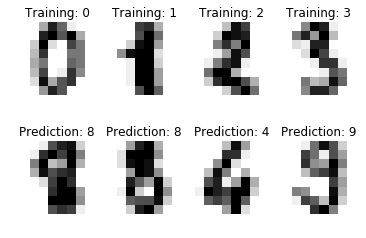

In [32]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

# Now predict the value of the digit on the second half:
expected = digits.target[int(n_samples / 2):]
predicted = classifier.predict(data[int(n_samples / 2):])

images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()


## Django : the best web framework
Django is a high-level Python Web framework that encourages rapid development and clean, pragmatic design.  
Built by experienced developers, it takes care of much of the hassle of Web development, so you can focus on writing your app without needing to reinvent the wheel. It’s free and open source. [Documentation](https://docs.djangoproject.com/en/dev/). [Demo](http://www.lafabriquediy.com/)

## Django REST : api builder
Django REST framework is a powerful and flexible toolkit for building Web APIs.
[Documentation](http://www.django-rest-framework.org/). [Demo](https://spotit.fr/api/)

## Flask : advanced microframework 
Flask is a microframework for Python based on Werkzeug, Jinja 2 and good intentions. 
[Documentation](http://flask.pocoo.org/)

## Pylint : code analysis
Code analyisis for python [Documentation](https://www.pylint.org/).  
Check the `passgen.py` code by running `pylint passgen.py` and try to improve it !

## Pytest : tests
The pytest framework makes it easy to write small tests, yet scales to support complex functional testing for applications and libraries.[Documentation](https://docs.pytest.org/en/latest/)

From your project directory simply run `pytest` to run all `test_*.py` files

## Gspread : Google spreadsheet api
Google spreadsheet python API [Documentation](https://github.com/burnash/gspread)

In [ ]:
import gspread
import datetime
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds']
# to get your own client_secret.json credentials goto : http://gspread.readthedocs.io/en/latest/oauth2.html
creds = ServiceAccountCredentials.from_json_keyfile_name('data/client_secret.json', scope)
client = gspread.authorize(creds)

# Find a workbook by name and open the first sheet
sheet = client.open("demo").sheet1

# Extract and print all of the values
list_of_hashes = sheet.get_all_records()
print(list_of_hashes)

#Append the current date and time

row = ["Date",datetime.datetime.now()]
index = 1
sheet.insert_row(row, index)